<a href="https://colab.research.google.com/github/groneperrosato/test/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will explore [clustering](https://developers.google.com/machine-learning/clustering/overview?hl=es-419), a type of algorithm that helps us separate our dataset into different groups. 

To do this, we will be using the ['wine'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) dataset from scikit-learn, which contains information about different types of wine. 

While in real-life scenarios, we may not have class labels for our data, we will use them in this notebook as an academic exercise to better understand the differences between the clusters.

# Exploring the data

To begin, we will load the wine dataset and explore its contents to better understand what we're working with.

In [2]:
# import the necessary libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

In [3]:
# load the data and see the keys

data = load_wine()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# see the description

print(data.DESCR) 

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
# create the dataset and see a sample of it

df = pd.concat(
              [pd.DataFrame(data = data.data, columns = data.feature_names),
               pd.DataFrame(data = data.target, columns = ["class"])],
               axis = 1)

df.sample(6)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.230,2.87,990.0,0
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.720,1.75,685.0,2
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.880,2.42,488.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.890,2.78,342.0,1
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.380,3.12,278.0,1


In [6]:
# see the data labels 

data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
# general info about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [8]:
# description of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
# count the number of instances in each class

df["class"].value_counts().sort_index()

0    59
1    71
2    48
Name: class, dtype: int64

We can extract useful information about our dataset:

- There are 13 feature columns, all of them being of the "float" type.
- The dataset contains three label classes, with 59, 71, and 48 observations respectively, representing class 0, class 1, and class 2.
- The data displays a wide range of scales, with high variance within each scale.
- The dataset comprises 178 entries, all of them complete with no null or missing values.




# Data Visualization

It is often useful to gain insight into the distribution of our observations.

However, with 13 feature columns, it is difficult to visualize the data in a graph, as we can only represent up to three dimensions at once. To overcome this challenge, we can apply the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method to reduce the dimensionality of our data and enable visualization.

To achieve this, we first need to standardize our data, as the PCA method is sensitive to variance.

Standardizing the data involves scaling it such that each feature has a mean of 0 and a standard deviation of 1. This is important because if we don't standardize the data, features with larger variances will dominate the analysis and mask the contribution of features with smaller variances.

In [10]:
# import the scaler

from sklearn.preprocessing import StandardScaler

# apply the scaler to our dataset

sc = StandardScaler()
scaled_data = sc.fit_transform(data.data)

# import PCA

from sklearn.decomposition import PCA

# apply pca

pca1 = PCA(n_components = 2,
           random_state = 12)

pca_scaled_data = pca1.fit_transform(scaled_data)



In [11]:
# create the new dataset

df_pca1_scaled = pd.concat([
            pd.DataFrame(data = pca_scaled_data, columns = ["component 1", "component 2"]),
            pd.DataFrame(data = data.target, columns = ["class"])],
            axis = 1
)

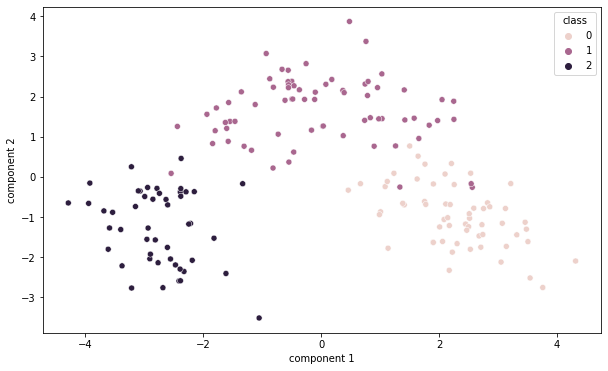

In [12]:
# visualize in a two dimensions graph our datset

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.scatterplot(x = df_pca1_scaled["component 1"],
                y = df_pca1_scaled["component 2"],
                hue = "class", 
                data = df_pca1_scaled)
plt.show()

In [13]:
print(f"The percentage of variance explained is {pca1.explained_variance_ratio_}")

The percentage of variance explained is [0.36198848 0.1920749 ]


As we can see, the variance explained by these two components is approximately 45%, which is relatively low. We may need more components to fully explain the model, but it is still useful for graphical representation.

Even though the values are not optimal, they still enable us to visualize the three groups that are present in our dataset.

# Clustering

Next, we will apply clustering to our model using the popular [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm with the modification of K-Means++. This method allows us to iterate multiple times and start each iteration in an intelligent way, searching for the best starting points.

Before applying K-Means, we will determine the optimal value of K using two well-known methods: [the elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and [the silhouette method](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).

## Elbow method



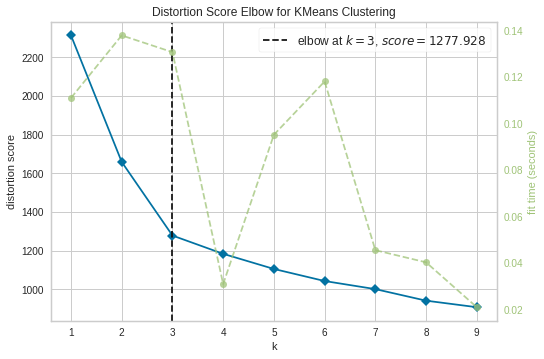

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# import the necessary libraries

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# create the model

model = KMeans(
    init = "k-means++", 
    max_iter = 400,
    random_state = 42,
    n_init = 7
)

# visualize the "elbow graph"

elbow = KElbowVisualizer(model,
                         k = (1,10),
                         random_state = 1    
)

elbow.fit(scaled_data)
elbow.show()

# Silhouette method

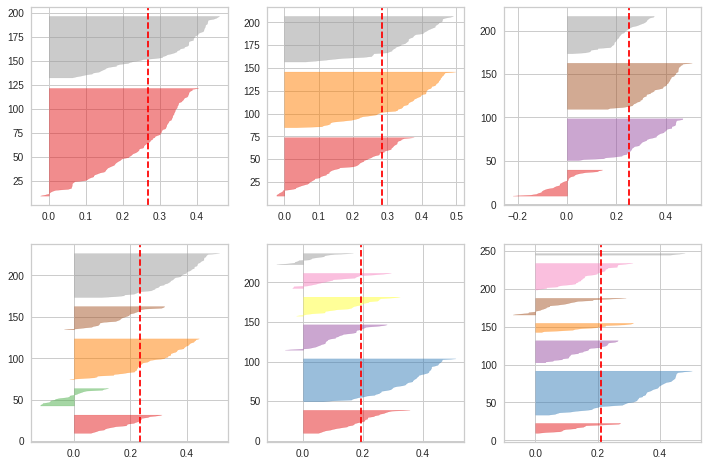

In [15]:
# import the libraries

from yellowbrick.cluster import SilhouetteVisualizer

# create the graph for the different Ks

fig, ax = plt.subplots(ncols = 3,
                       nrows = 2, 
                       figsize = (12,8))
ax = ax.flatten() 

for i in range(2,8):
  model = KMeans(
        init = "k-means++", 
        max_iter = 400,
        random_state = 12,
        n_init = 7,
        n_clusters = i
    )
  silou = SilhouetteVisualizer(model, ax = ax[i-2])
  silou.fit(scaled_data)
  

plt.show()



After applying both methods, it becomes clear that the optimal number of clusters is 3.

The Elbow method shows an evident "elbow" point at k=3, indicating that the increase in cluster numbers beyond 3 does not significantly improve the quality of the clustering. The Silhouette method also supports this conclusion, as the highest silhouette score is achieved for k=3.

Moreover, the resulting clusters have similar sizes, and the number of misclassified observations is negligible, demonstrating the robustness and accuracy of the clustering algorithm.

# K Means Clustering

Once we have determined the optimal value of K for this dataset, we can proceed to train our K-Means model and observe its clustering performance.

Using the chosen value of K, the K-Means algorithm partitions the data into K clusters by minimizing the sum of squared distances between each point and its assigned cluster center. 


Overall, K-Means is a powerful and widely used clustering algorithm that can provide valuable insights into the underlying structure of complex datasets.

In [26]:
# create the final model

final_cluster = KMeans(
    init = "k-means++", 
    max_iter = 550,
    random_state = 15,
    n_init = 10,
    n_clusters = 3
)

# predict the clusters

labels_predict = final_cluster.fit_predict(scaled_data)

In [34]:
# create a dataset with the predictions and the original labels

finaldf = pd.concat([
          pd.DataFrame(data = data.target, columns = ["original_class"]),
          pd.DataFrame(data = labels_predict, columns = ["cluster_class"]),
          pd.DataFrame(data = data.data, columns = data.feature_names)
], axis = 1)

# replace 0 for 2 and 2 for 0 in cluster_class 

finaldf["cluster_class"].replace([0,2],[2,0], inplace = True)

In [66]:
# create the samedataset but with pca to represent it

finaldf_pca = pd.concat([         
          pd.DataFrame(data = pca_scaled_data, columns = ["component 1", "component 2"]),
          finaldf["cluster_class"],
          finaldf["original_class"]],
          axis = 1)


# see a example of the dataset

finaldf_pca.sample(6)

,component 1,component 2,cluster_class,original_class
7,2.059437,-1.608963,0,0
99,1.410216,2.166192,1,1
29,2.256109,-0.191462,0,0
166,-2.406111,-2.592356,2,2
54,2.146988,-1.016752,0,0
94,0.957455,2.223528,1,1


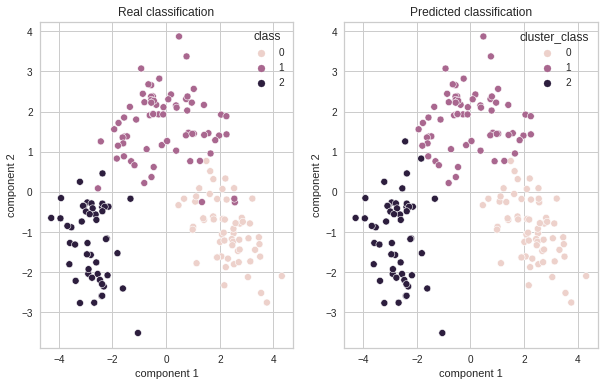

In [63]:
# visualize the results and compare

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (10,6))

sns.scatterplot(x = df_pca1_scaled["component 1"],
                y = df_pca1_scaled["component 2"],
                hue = "class", 
                data = df_pca1_scaled,
                ax = ax[0])

sns.scatterplot(x = finaldf_pca["component 1"],
                y = finaldf_pca["component 2"],
                hue = "cluster_class", 
                data = finaldf_pca,
                ax = ax[1])

ax[0].set_title("Real classification")
ax[1].set_title("Predicted classification")

plt.show()

In [61]:
# check the accuracy of the predictions

from sklearn.metrics import accuracy_score

print(f"The predictions have an accuracy of: {round(accuracy_score(data.target, finaldf_pca['cluster_class']), 3)}")

The predictions have an accuracy of: 0.966


# Conclusions

In conclusion, clustering is a very useful technique that allows us to group similar observations together in a dataset. In this particular case, we were able to compare our clustering results with the actual class labels and found that our model achieved an accuracy of almost 97%.

By analyzing the resulting clusters, we can also observe that some of the observations are more accurately classified by the clustering algorithm than by the actual class labels. This highlights the potential of clustering to uncover hidden patterns and insights in data that may not be immediately apparent.

Overall, clustering is a powerful tool for data scientists to develop insightful and helpful models, and should be considered as part of any data analysis or machine learning pipeline.
